In [20]:
import math
import matplotlib.pyplot as plt
import torch
from torch import nn

In [68]:
# Use gpu if available
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

dataSize = 100000
domain = 8 # Deal with input having a domain of -domain to +domain
N = 2 # N elements in later array

# Function that the neural network will learn
def funcOutput(inputs):
    return torch.exp(inputs)*torch.cos(inputs)

inputs = torch.zeros(dataSize, N)
outputs = inputs

def makeTrainingData(domain, N, dataSize):
    # Create a list of sets of N random numbers for training data
    inputs = torch.FloatTensor(dataSize, N).uniform_((-1*domain),domain).to(device)
    outputs = funcOutput(inputs).to(device)

    # Print input and output tensor training data
    print("Inputs:")
    print(inputs)
    print("Outputs:")
    print(outputs)
    
    return inputs, outputs

In [69]:
# Create the neural network
hidden_nodes = 5000

def makeModel(hidden_nodes):
    model = torch.nn.Sequential(
       torch.nn.Linear(inputs.shape[1],hidden_nodes),
        torch.nn.ReLU(),
        #torch.nn.Linear(hidden_nodes,hidden_nodes),
        #torch.nn.ReLU(),
        torch.nn.Linear(hidden_nodes,outputs.shape[1])
        ).to(device)
    
    return model

In [70]:
def trainModel(inputs, outputs):
    # Get ready to train
    model.train().to(device)

    # Break the list up into smaller batches for more efficient training
    numMiniBatch = int(math.floor(inputs.shape[0]/100.))
    inputMiniBatches = inputs.chunk(numMiniBatch)
    outputMiniBatches = outputs.chunk(numMiniBatch)

    # Train the neural network
    lossFunc = torch.nn.MSELoss().to(device)
    optimizer = torch.optim.Adam(model.parameters(),lr=1e-4)

    n_epochs = 500
    print("Training...")
    print("_" * 50)
    for epoch in range(n_epochs):
    # Print something every 10 epochs of training
        if epoch%10 == 0:
            #print('=>Starting {}/{} epochs.'.format(epoch+1,n_epochs))
            print('.', end='')
        # Train the model
        for minibatch in range(numMiniBatch):
            prediction = model(inputMiniBatches[minibatch]).to(device)
            loss = lossFunc(prediction,outputMiniBatches[minibatch]).to(device)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    print()
    print("Training done!")

In [71]:
def plotResults(inputs, outputs):
    model.eval()
    incrmSize = 100
    realX = torch.linspace(-domain, domain, int(2*domain*incrmSize))
    realY = funcOutput(realX)
    modelY = []

    for i in range((-domain*incrmSize), (domain*incrmSize), 1):
        x = model(torch.tensor([i/incrmSize, (i+1)/incrmSize]).to(device)) #N elements here
        modelY.append(x[0].tolist())

    # Plot results   
    plt.scatter(realX, modelY, s = 10)
    plt.plot(realX, realY, 'r')

Create the Model

The model can be trained multiple times for more accurate results.

In [72]:
inputs, outputs = makeTrainingData(domain, N, dataSize)
model = makeModel(hidden_nodes)

Inputs:
tensor([[-3.2607,  1.2552],
        [-6.9341,  3.1797],
        [ 1.5587,  2.5329],
        ...,
        [-5.9115, -6.9151],
        [-3.5204, -4.3460],
        [ 5.4017,  7.0903]], device='cuda:0')
Outputs:
tensor([[-3.8090e-02,  1.0890e+00],
        [ 7.7481e-04, -2.4023e+01],
        [ 5.7450e-02, -1.0328e+01],
        ...,
        [ 2.5231e-03,  8.0105e-04],
        [-2.7491e-02, -4.6418e-03],
        [ 1.4107e+02,  8.3009e+02]], device='cuda:0')


Training...
__________________________________________________
..................................................
Training done!


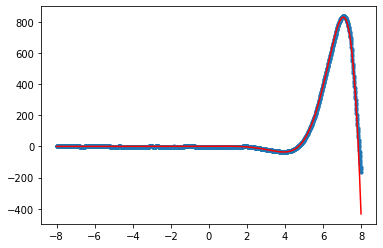

In [73]:
trainModel(inputs, outputs)
plotResults(inputs, outputs)

NOTE: Not sure if training in cuda makes it faster with program coded as is.